In [1]:
import plotly
import numpy as np
import plotly.graph_objects as go

In [2]:
import sys
sys.path.insert(0, '..')

In [5]:
from pathlib import Path

import numpy as np

from outdoorar import sphere_sampling
from outdoorar.obj_reader import ObjFileReader
from outdoorar.ray_casting import Triangle

import plotly.io as pio
pio.renderers.default = "png"

In [5]:
file_path = Path('.').resolve().parent.joinpath('models', 'cube.obj')
geometry = ObjFileReader(file_path).geometry

N = 4
direction_vectors = sphere_sampling.get_cartesian_coordinates(N)

In [6]:
def plot_geometry(geometry, fig=None):

    tri_points = np.array([
        geometry.vertices[i] for i in geometry.faces.reshape(-1)
    ])
    Xe, Ye, Ze = tri_points.T
    
    vertices = geometry.vertices.T
    faces = geometry.faces.T

    if fig is None:
        fig = go.Figure()
    fig.add_trace(
        go.Mesh3d(
            x=vertices[0], 
            y=vertices[1], 
            z=vertices[2], 
            i=faces[0], 
            j=faces[1], 
            k=faces[2],
            opacity=0.4, 
            color='gray',
        ))
    fig.add_trace(
        go.Scatter3d(
           x=Xe,
           y=Ye,
           z=Ze,
           mode='lines',
           name='',
           line=dict(color='red', width=1)
        )  
    )
    return fig

In [7]:
def highlight_face(geometry, faces_to_highlight, color='red', fig=None):
    if fig is None:
        fig = go.Figure()
       
    fig.add_trace(
        go.Mesh3d(
            x=geometry.vertices.T[0], 
            y=geometry.vertices.T[1], 
            z=geometry.vertices.T[2], 
            i=geometry.faces[faces_to_highlight, 0], 
            j=geometry.faces[faces_to_highlight, 1], 
            k=geometry.faces[faces_to_highlight, 2],
            opacity=0.4, 
            color=color,
        ))
    return fig

In [8]:
def draw_directional_vectors(point, direction_vectors, fig=None, highlight=None):
    x = direction_vectors.T[0].ravel()
    y = direction_vectors.T[1].ravel()
    z = direction_vectors.T[2].ravel()

    if fig is None:
        fig = go.Figure()
    for xx, yy, zz in zip(x, y, z):
        fig.add_trace(
            go.Scatter3d(
                x=np.array([point[0], xx+point[0]]), 
                y=np.array([point[1], yy+point[1]]), 
                z=np.array([point[2], zz+point[2]]), 
                mode='lines',
                line=dict(color='darkgoldenrod')
            )
        )
    fig.add_trace(
        go.Scatter3d(
            x=[point[0]],
            y=[point[1]],
            z=[point[2]],
            mode='markers', 
            marker=dict(color='goldenrod'),
        )
    )
    fig.add_trace(
        go.Cone(
            x=x+point[0], 
            y=y+point[1], 
            z=z+point[2], 
            u=0.1*x, 
            v=0.1*y, 
            w=0.1*z, 
            colorscale='Blues', 
            showscale=False,
        )
    )
    
    if highlight is not None:
        fig = highlight_face(geometry, [highlight], fig=fig)
        title = f'Directional invisibility of a point wrt face {highlight} - {len(direction_vectors)} vectors'
    else:
        title = 'Directional visibility of a point'
    
    fig.update_layout({
        'scene': {
          'camera': {
            'eye': {'x': -0.76, 'y': 1.8, 'z': 0.92}, 
          },
        },
        'showlegend': False,
        'margin': dict(l=0, r=0, t=50, pad=4),
        'title': title,
        'template': 'plotly_white',
        'title_x': 0.5
    })
    return fig

In [9]:
def get_directional_maps_func(point, geometry, direction_vectors):
    
    def draw_directional_map(face_idx):
        face = geometry.faces[face_idx]
        triangle = Triangle(*[geometry.vertices[vertex_idx] for vertex_idx in face])
        inside_triangle, squared_distances = triangle.does_ray_intersect(point, direction_vectors)
        fig = plot_geometry(geometry)    
        fig = draw_directional_vectors(point, direction_vectors[inside_triangle], fig, highlight=face_idx)
        return fig
    
    return draw_directional_map

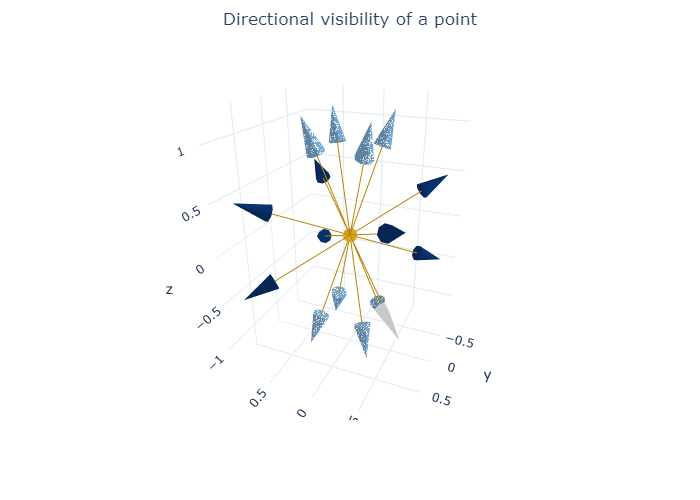

In [10]:
draw_directional_vectors([0,0,0], direction_vectors).show()

In [11]:
point = [0.5, 0, 0.5]

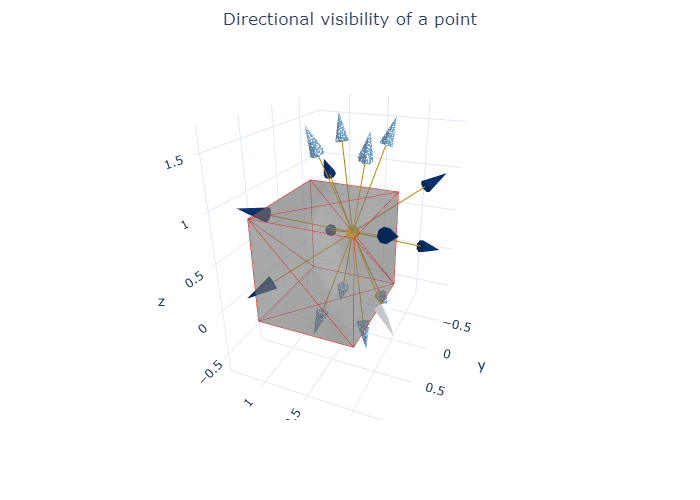

In [12]:
fig = plot_geometry(geometry)    
fig = draw_directional_vectors(point, direction_vectors, fig)
fig.show() 

In [13]:
get_directional_maps = get_directional_maps_func(point, geometry, direction_vectors)

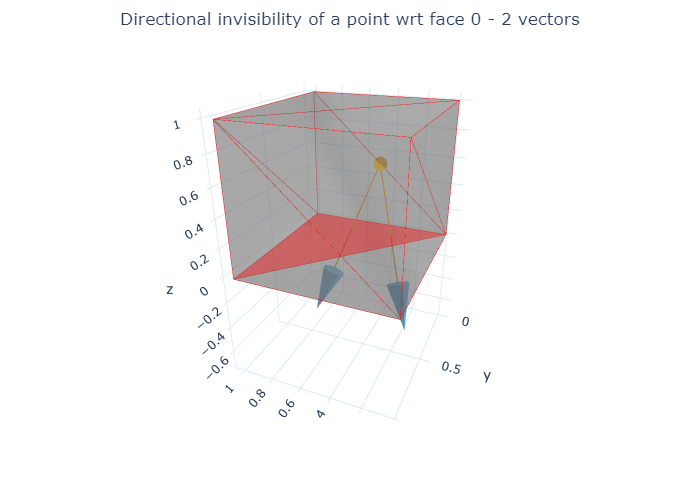

In [14]:
get_directional_maps(0).show()

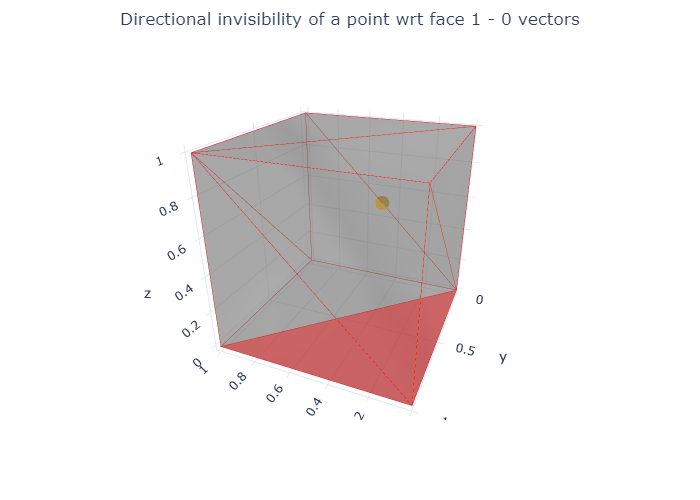

In [15]:
get_directional_maps(1).show()

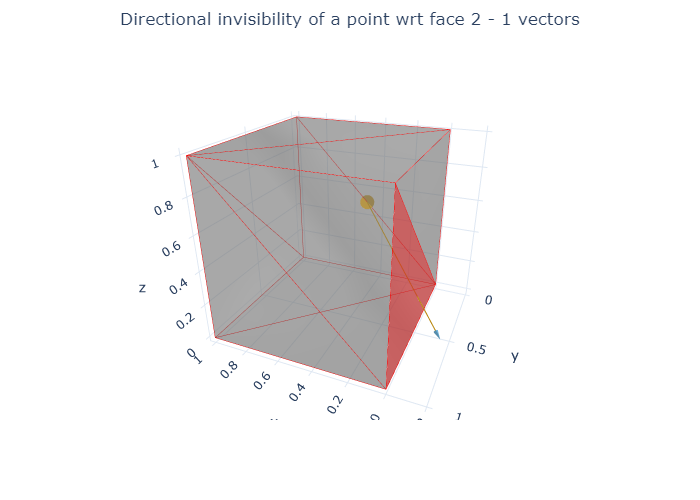

In [16]:
get_directional_maps(2).show()

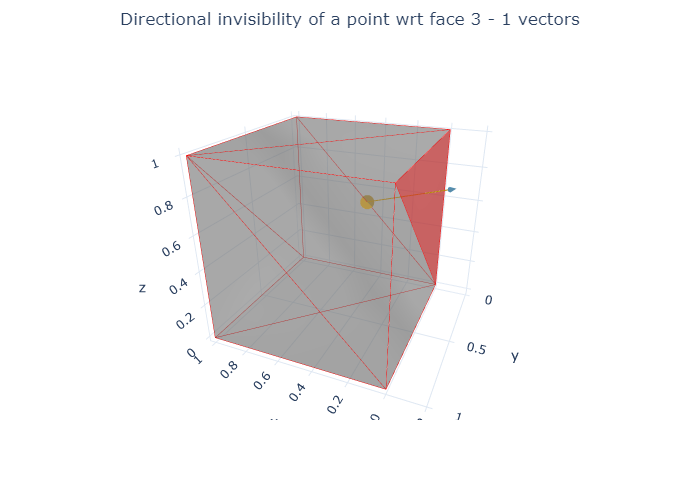

In [17]:
get_directional_maps(3).show()

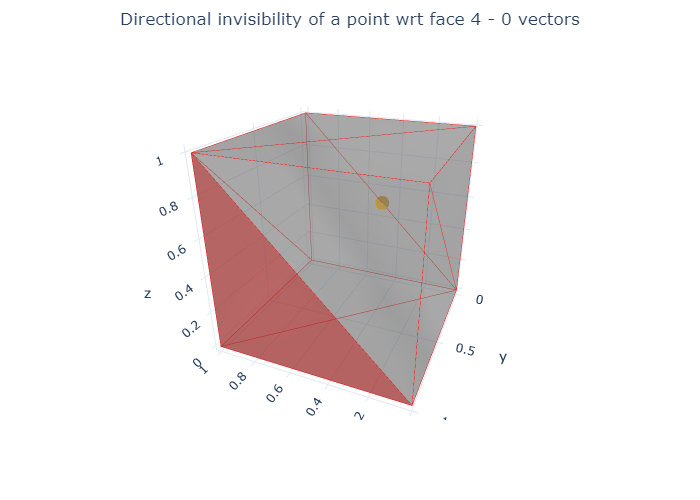

In [18]:
get_directional_maps(4).show()

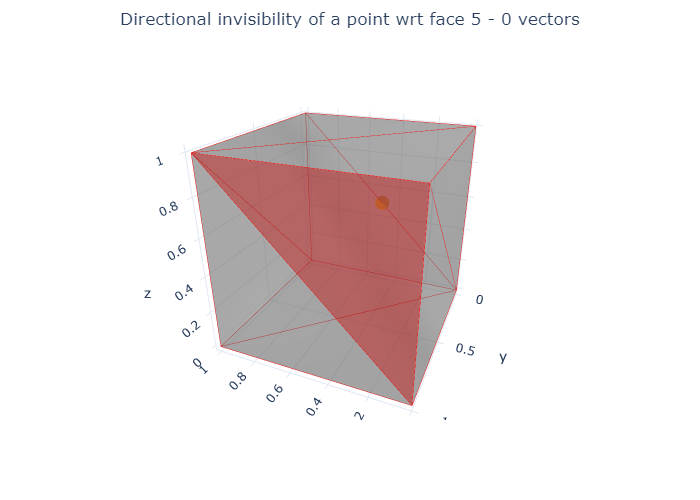

In [19]:
get_directional_maps(5).show()

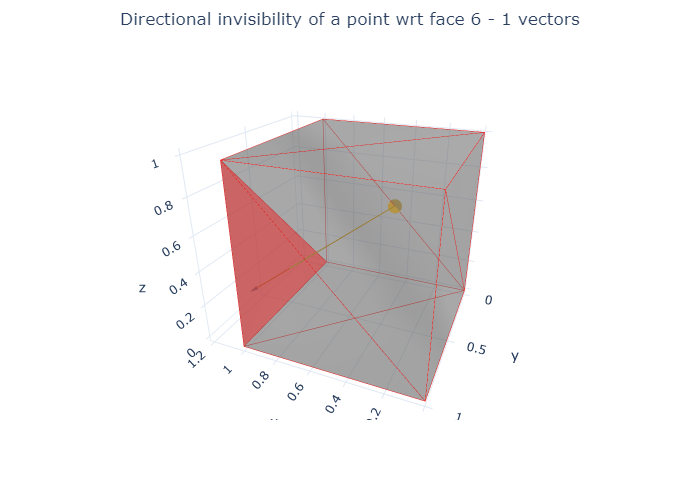

In [20]:
get_directional_maps(6).show()

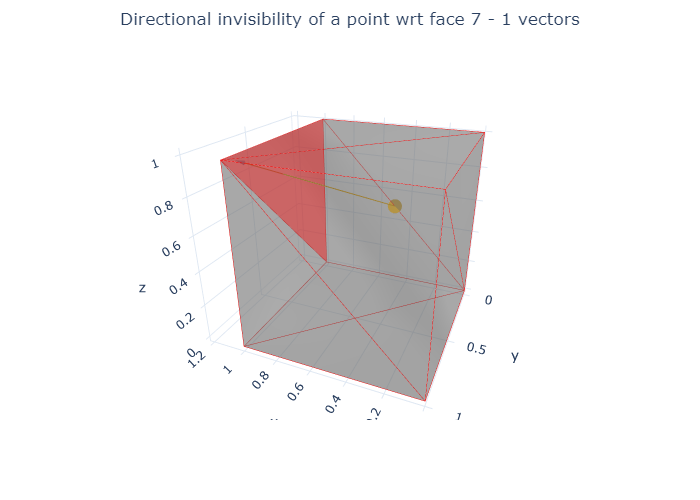

In [21]:
get_directional_maps(7).show()

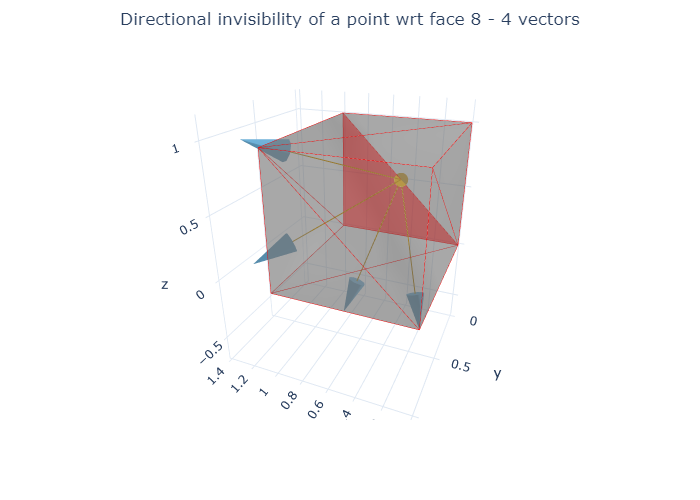

In [22]:
get_directional_maps(8).show()

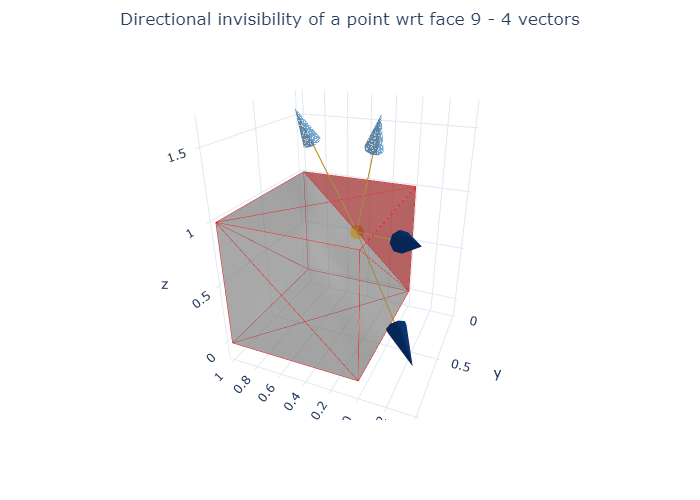

In [23]:
get_directional_maps(9).show()

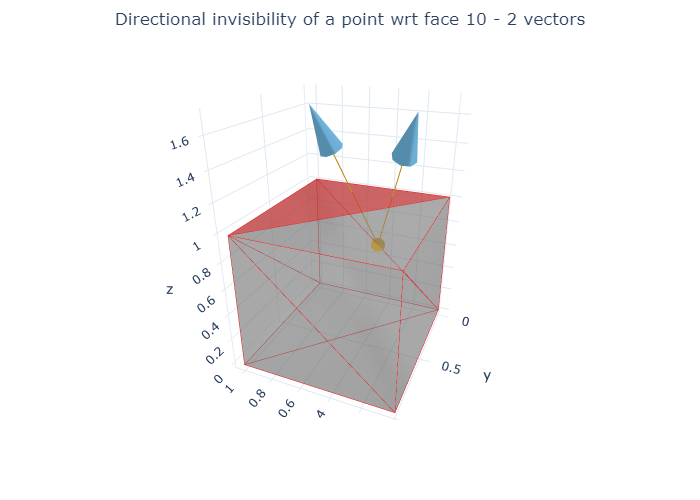

In [24]:
get_directional_maps(10).show()

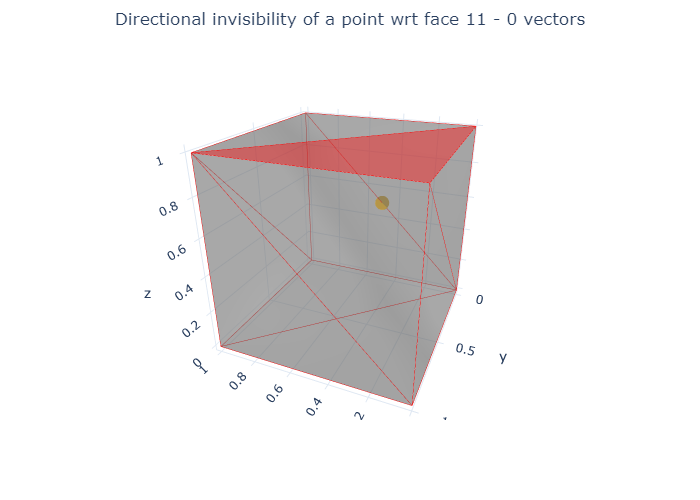

In [25]:
get_directional_maps(11).show()